<a href="https://colab.research.google.com/github/Visors/Mnist/blob/main/CNN/mnist-cnn-keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST CNN Keras

This is a simple example of a convolutional neural network (CNN) for classifying handwritten digits from the MNIST dataset using Keras.

## Import libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.18.0


## Load MNIST data

Load the MNIST dataset using the Keras API.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, sep="\n")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Visualize some data

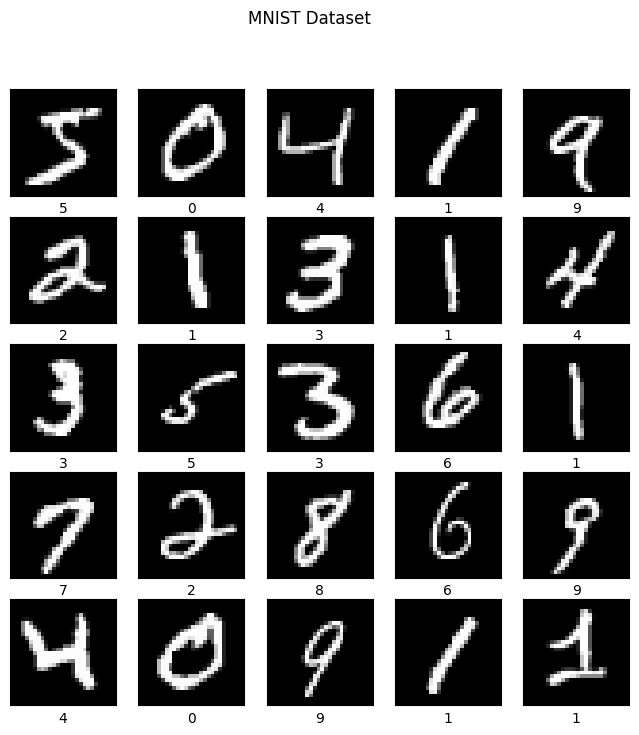

In [3]:
plt.figure(figsize=(8, 8))
plt.suptitle("MNIST Dataset")
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.imshow(x_train[i], cmap="gray")
    plt.xlabel(y_train[i])
plt.show()

## Data augmentation

Since the newer version of tensorflow decrepated the `ImageDataGenerator` class, we will use the Layers API to augment the data. To do this, build a image augmentator block.

In [4]:
img_height, img_width = 28, 28
data_augmentation = tf.keras.Sequential(
    [
        # tf.keras.layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)), # Don't do flip op since some digits may look similar to other after flip.
        tf.keras.layers.Resizing(140, 140),
        tf.keras.layers.RandomBrightness(0.25),
        tf.keras.layers.RandomRotation(0.05, 'wrap', 'bilinear', None),
        tf.keras.layers.RandomZoom(0.1, 0.15),
    ]
)

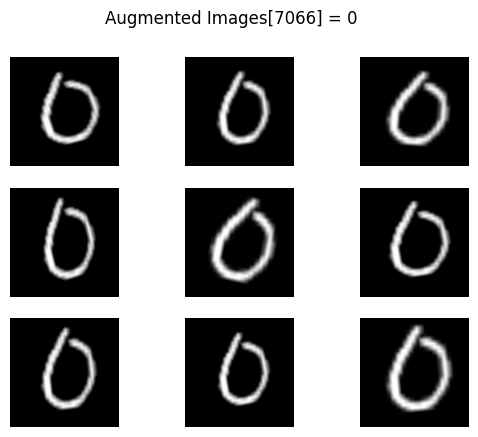

In [5]:
# have a look
x_train_index = np.random.randint(len(x_train))
# plt.figure(figsize=(8, 8))
plt.suptitle(f"Augmented Images[{x_train_index}] = {y_train[x_train_index]}")
for i in range(9):
    augmented_images = data_augmentation(x_train[x_train_index].reshape((1, 28, 28, 1)))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"), cmap='gray')
    plt.axis("off")

## Create the model

In [6]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(64, (4, 4), padding='same' , activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same' , strides=2,  activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same' , activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same' , activation='relu'),
    tf.keras.layers.Conv2D(64, (2, 2), padding='same' , activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (2, 2), padding='same' , activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

## Compile the model

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
cnn.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Summary the model

In [8]:
cnn.summary(expand_nested=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 140, 140, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ resizing (Resizing)             │ (1, 140, 140, 1)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_brightness               │ (1, 140, 140, 1)            │               0 │
│ (RandomBrightness)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_rotation                 │ (1, 140, 140, 1)            │               0 │
│ (RandomRotation)                     │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_zoom (RandomZoom)        │ (1, 140, 140, 1)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 140, 140, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 140, 140, 64)        │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 70, 70, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 70, 70, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 35, 35, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 35, 35, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 17, 17, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,735,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 5,112,330 (19.50 MB)

 Trainable params: 5,112,330 (19.50 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [9]:
batch_size = 256
epochs = 30
history = cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_split=0.2, shuffle=False)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


188/188 ━━━━━━━━━━━━━━━━━━━━ 108s 497ms/step - accuracy: 0.1073 - loss: 30818550.0000 - val_accuracy: 0.1060 - val_loss: 2.3026
Epoch 2/30
155/188 ━━━━━━━━━━━━━━━━━━━━ 14s 439ms/step - accuracy: 0.1119 - loss: 2.3033

KeyboardInterrupt: 

## Visualize training result

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()